In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cereals-dataset/cereal.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/kaggle/input/cereals-dataset/cereal.csv')

In [4]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
# droping few variables ['shelf','cups','rating']
df.drop(['shelf','cups','mfr','type'] , axis=1 , inplace=True)
df.sample(10)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
9,Bran Flakes,90,3,0,210,5.0,13.0,5,190,25,1.0,53.313813
41,Life,100,4,2,150,2.0,12.0,6,95,25,1.0,45.328074
69,Total Corn Flakes,110,2,1,200,0.0,21.0,3,35,100,1.0,38.839746
42,Lucky Charms,110,2,1,180,0.0,12.0,12,55,25,1.0,26.734515
33,Grape-Nuts,110,3,0,170,3.0,17.0,3,90,25,1.0,53.371007
73,Trix,110,1,1,140,0.0,13.0,12,25,25,1.0,27.753301
66,Smacks,110,2,1,70,1.0,9.0,15,40,25,1.0,31.230054
53,Product 19,100,3,0,320,1.0,20.0,3,45,100,1.0,41.503540
75,Wheaties,100,3,1,200,3.0,17.0,3,110,25,1.0,51.592193
10,Cap'n'Crunch,120,1,2,220,0.0,12.0,12,35,25,1.0,18.042851


In [6]:
# remove the name from the data but before that let us store into pd series 
labels = df['name'] # storing name seprately 
df.drop(['name'], axis = 1, inplace = True) # dropping name from the data frame 

In [7]:
# checking the missing values 
df.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
rating      0
dtype: int64

In [8]:
# Load the modules required to handle the missing values 
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='median')
mean_imputer.fit(df) # computes the median values and stores it 

SimpleImputer(strategy='median')

In [9]:
# apply the missing value imputation method on cereals data and convert into data frame
df = pd.DataFrame(mean_imputer.transform(df), columns=df.columns)

In [10]:
# check if we still have missing vaules 
df.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
rating      0
dtype: int64

In [11]:
# load the methods to standardize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [12]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,1.029610,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.150477,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.500000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,1.000000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,93.704912


In [13]:
# Convert the standardize the data into data frame 
cereals_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cereals_std.sample(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
33,0.161019,0.417912,-1.013072,0.123966,0.358155,0.565173,-0.888166,-0.085819,-0.14627,-0.198067,0.767088
40,0.161019,-0.501495,-0.012988,1.204578,-0.908824,1.506111,-0.888166,-0.791811,-0.14627,-0.198067,-0.245389
10,0.677623,-1.420902,0.987096,0.724306,-0.908824,-0.610998,1.149910,-0.862410,-0.14627,-0.198067,-1.764349
12,0.677623,-1.420902,1.987181,0.604238,-0.908824,-0.375764,0.470552,-0.721211,-0.14627,-0.198067,-1.636751
44,2.227436,1.337319,1.987181,-0.776544,0.358155,0.329939,0.923458,1.043767,-0.14627,-0.198067,-0.396169
75,-0.355585,0.417912,-0.012988,0.484170,0.358155,0.565173,-0.888166,0.196577,-0.14627,-0.198067,0.639627
2,-1.905397,1.337319,-0.012988,1.204578,2.892113,-1.787170,-0.435260,3.161741,-0.14627,-0.198067,1.200922
22,-0.355585,-0.501495,-0.012988,-0.236238,-0.064172,-0.846233,0.697005,0.337776,-0.14627,-0.198067,-0.465005
8,-0.872189,-0.501495,-0.012988,0.484170,0.780481,0.094705,-0.208807,0.408375,-0.14627,-0.198067,0.462500
36,0.161019,0.417912,-0.012988,1.084510,-0.275335,-0.728615,0.697005,-0.085819,-0.14627,-0.198067,-0.830731


**Hierarchical Clustering - Dendrogram**

In [14]:
# Load the modules required for Hierarchical clustering
from scipy.cluster.hierarchy import linkage , dendrogram
import matplotlib.pyplot as plt

In [15]:
# Constructing the linkage matrix 
linkage_matrix =linkage(cereals_std, method = 'single' , metric='cityblock')

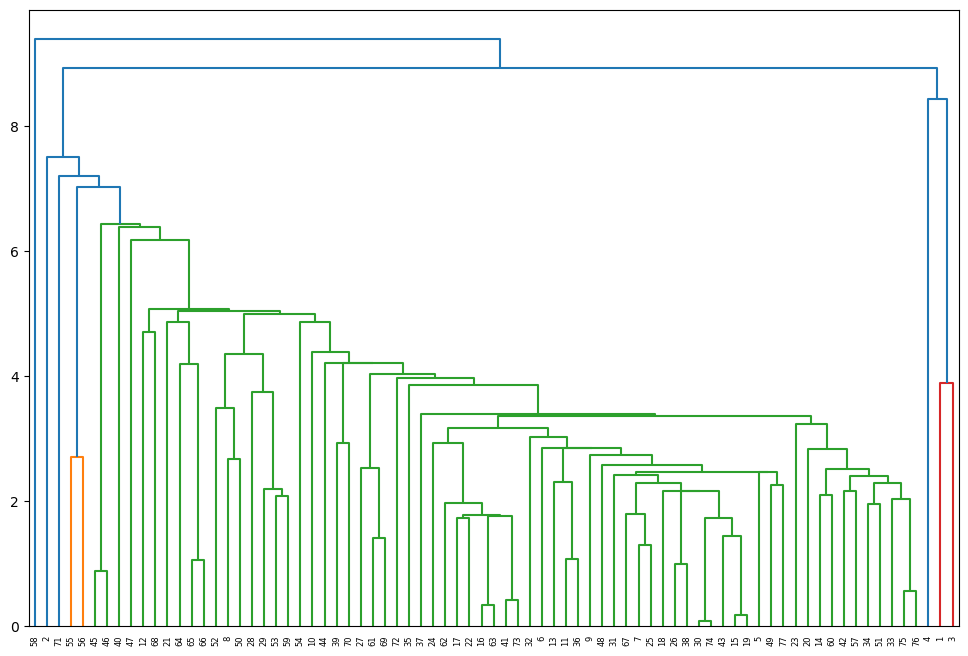

In [16]:
#  Construcitng the dendrogram and visualizing the dendrogram
labelList = range(1,cereals_std.shape[0]+1) 
plt.figure(figsize=(12,8))
dendrogram(linkage_matrix, labels=labelList)
plt.show()

**## Hierarchical Clustering - Agglomerative Clustering**

In [17]:
# loading the Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering


In [18]:
# Buiding Agglomerative Clustering 
clust = AgglomerativeClustering(n_clusters = 6,
                                affinity = 'euclidean',
                                linkage = 'ward')


In [19]:
# applying on the cereals data 
cluster_predictions = clust.fit_predict(cereals_std)
cluster_predictions

array([5, 2, 5, 5, 3, 3, 3, 4, 0, 0, 3, 0, 3, 2, 3, 0, 0, 3, 3, 2, 1, 0,
       3, 0, 3, 3, 1, 4, 4, 3, 3, 3, 0, 0, 2, 3, 3, 3, 0, 4, 0, 2, 3, 1,
       2, 2, 4, 0, 3, 4, 0, 4, 4, 0, 1, 1, 0, 2, 4, 2, 1, 0, 0, 1, 1, 1,
       3, 0, 1, 0, 4, 0, 0, 3, 0, 0, 3])

In [20]:
df['H_Cluster'] = cluster_predictions

In [21]:
# Create data frame combining the labels and Clusters together 
result = pd.DataFrame({'Lables':labels,'Cluster':cluster_predictions})
result.sample(10)

,Lables,Cluster
24,Froot Loops,3
44,Muesli Raisins; Dates; & Almonds,2
39,Just Right Fruit & Nut,4
14,Cocoa Puffs,3
58,Raisin Bran,4
53,Product 19,0
57,Quaker Oatmeal,2
56,Quaker Oat Squares,0
18,Count Chocula,3
71,Total Whole Grain,0


In [22]:
df.head(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating,H_Cluster
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,1.00,68.402973,5
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,1.00,33.983679,2
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,1.00,59.425505,5
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,1.00,93.704912,5
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,1.00,34.384843,3
5,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.0,25.0,1.00,29.509541,3
6,110.0,2.0,0.0,125.0,1.0,11.0,14.0,30.0,25.0,1.00,33.174094,3
7,130.0,3.0,2.0,210.0,2.0,18.0,8.0,100.0,25.0,1.33,37.038562,4
8,90.0,2.0,1.0,200.0,4.0,15.0,6.0,125.0,25.0,1.00,49.120253,0
9,90.0,3.0,0.0,210.0,5.0,13.0,5.0,190.0,25.0,1.00,53.313813,0


In [23]:

df.groupby('H_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,rating
H_Cluster,,,,,,,,,,,
0,100.0,2.0,1.0,220.0,1.0,17.0,3.0,80.0,25.0,1.00,46.658844
1,90.0,2.5,0.0,0.0,2.5,15.5,0.0,95.0,0.0,1.00,61.880879
2,110.0,3.0,3.0,140.0,2.7,12.0,7.0,135.0,25.0,1.00,40.400208
3,110.0,1.5,1.0,180.0,0.5,12.0,11.5,40.0,25.0,1.00,29.716913
4,130.0,3.0,1.5,195.0,3.5,14.5,11.0,175.0,25.0,1.33,37.439578
5,70.0,4.0,1.0,140.0,10.0,7.0,5.0,320.0,25.0,1.00,68.402973


In [24]:
# viewing all the cluster membership at one go
result.Cluster.values

array([5, 2, 5, 5, 3, 3, 3, 4, 0, 0, 3, 0, 3, 2, 3, 0, 0, 3, 3, 2, 1, 0,
       3, 0, 3, 3, 1, 4, 4, 3, 3, 3, 0, 0, 2, 3, 3, 3, 0, 4, 0, 2, 3, 1,
       2, 2, 4, 0, 3, 4, 0, 4, 4, 0, 1, 1, 0, 2, 4, 2, 1, 0, 0, 1, 1, 1,
       3, 0, 1, 0, 4, 0, 0, 3, 0, 0, 3])

**## K-means Clustering**

In [25]:
# Load the module for kmeans from sklearn 
from sklearn.cluster import KMeans 

In [26]:
# apply it on our data 
km = KMeans(n_clusters=2                                                       )
km.fit(cereals_std)



KMeans(n_clusters=2)

In [27]:
km.inertia_


664.360419281347

In [28]:
# For loop to know the suitable k 
wss = {}
for k in range(2,25):
    km = KMeans(n_clusters=k)
    km.fit(cereals_std)
    wss[k] = km.inertia_

In [29]:
# Cluster keys from wss 
wss.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [30]:
# within ss for each cluster values
wss.values()

dict_values([667.7570799868772, 550.1015518277474, 462.92053492401766, 386.2227035440753, 330.7687896344263, 287.76746471364214, 250.23673030624377, 222.88670299505992, 199.2891860052059, 185.65976131347384, 172.97287229861797, 160.04420030163155, 146.8141371089696, 129.4973625015104, 116.71020647113234, 106.98356131634243, 97.48915510190801, 92.00652285799416, 86.42224807900774, 82.6642885072489, 77.29040451012652, 71.37107891655612, 68.2552526793153])

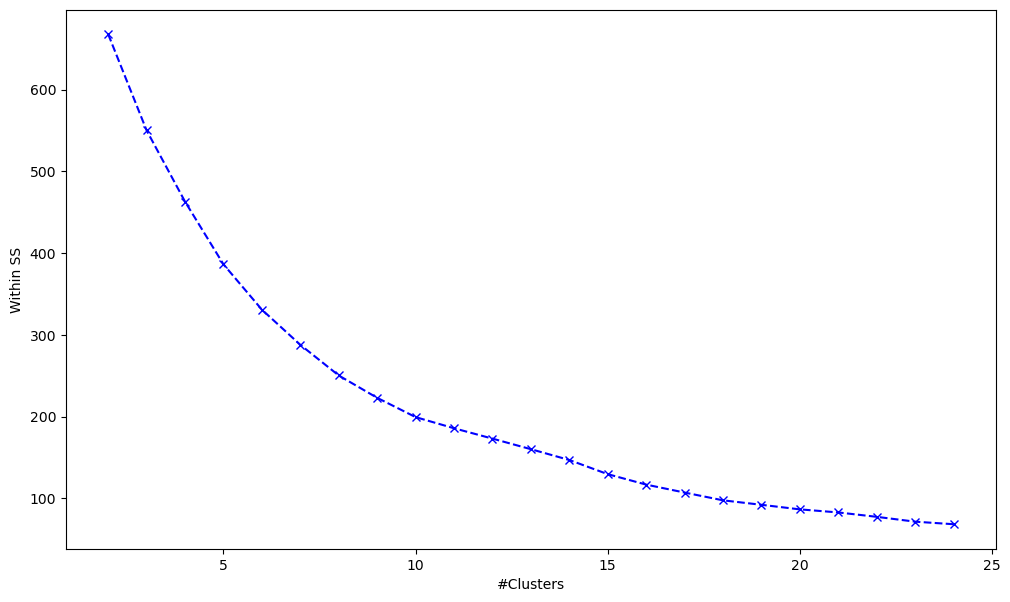

In [31]:
# plotting the withinss 
plt.figure(figsize = (12,7))
plt.plot(list(wss.keys()), list(wss.values()), 'bx--')
plt.xlabel('#Clusters')
plt.ylabel('Within SS')
plt.show()

In [32]:
# Building the K-means with x number of Clusters
km  = KMeans(n_clusters=6, random_state =4545 , n_init =50 )
km.fit(cereals_std)

KMeans(n_clusters=6, n_init=50, random_state=4545)

In [33]:
# Applying the Kmeans on the cereals data with the x cluster
kmeans_clusters = km.predict(cereals_std)

In [34]:
result = pd.DataFrame({'Labels':labels,'KMeans_Cluster':kmeans_clusters})
result.sample(10)

,Labels,KMeans_Cluster
46,Mueslix Crispy Blend,0
31,Golden Grahams,4
5,Apple Cinnamon Cheerios,4
71,Total Whole Grain,2
69,Total Corn Flakes,2
1,100% Natural Bran,3
27,Fruit & Fibre Dates; Walnuts; and Oats,0
43,Maypo,1
57,Quaker Oatmeal,3
13,Clusters,3


In [35]:
### Add Cluster Labels to Original Data and get cluster chracteristics
df['KMeans_Cluster'] = result['KMeans_Cluster']

In [36]:
# Check the median for each variable w.r.to each cluster
df.drop(['H_Cluster','rating'],axis=1).groupby('KMeans_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight
KMeans_Cluster,,,,,,,,,,
0,130.0,3.0,1.5,195.0,3.5,14.5,11.0,175.0,25.0,1.33
1,90.0,2.5,0.0,0.0,2.5,15.5,0.0,95.0,0.0,1.00
2,100.0,2.0,0.0,220.0,1.0,18.0,3.0,60.0,25.0,1.00
3,110.0,4.0,2.0,140.0,2.5,13.0,7.0,110.0,25.0,1.00
4,110.0,1.5,1.0,180.0,0.5,12.0,11.5,40.0,25.0,1.00
5,70.0,4.0,1.0,140.0,10.0,7.0,5.0,320.0,25.0,1.00


** Outliers will influence the results** 
* Hierarchical clustering the distances are computed only once** 
* K-Means Clustering the cluster membership changes with initial cluster seeds **

In [37]:
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import NearestNeighbors

In [38]:
model=DBSCAN(eps=2,min_samples=2).fit(cereals_std)
clusters=pd.DataFrame(model.labels_,columns=['clusters'])

In [39]:
### Add Cluster Labels to Original Data and get cluster chracteristics
df['DBSCAN_Cluster'] = clusters['clusters']

In [40]:
# Check the median for each variable w.r.to each cluster
df.drop(['DBSCAN_Cluster','KMeans_Cluster','rating', 'weight'],axis=1).groupby('H_Cluster')

In [41]:
# Check the median for each variable w.r.to each cluster
df.drop(['H_Cluster','DBSCAN_Cluster','weight','rating'],axis=1).groupby('KMeans_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
KMeans_Cluster,,,,,,,,,
0,130.0,3.0,1.5,195.0,3.5,14.5,11.0,175.0,25.0
1,90.0,2.5,0.0,0.0,2.5,15.5,0.0,95.0,0.0
2,100.0,2.0,0.0,220.0,1.0,18.0,3.0,60.0,25.0
3,110.0,4.0,2.0,140.0,2.5,13.0,7.0,110.0,25.0
4,110.0,1.5,1.0,180.0,0.5,12.0,11.5,40.0,25.0
5,70.0,4.0,1.0,140.0,10.0,7.0,5.0,320.0,25.0


In [42]:
# Check the median for each variable w.r.to each cluster
# -1 is for 
df.drop(['H_Cluster','KMeans_Cluster', 'weight','rating'],axis=1).groupby('DBSCAN_Cluster').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
DBSCAN_Cluster,,,,,,,,,
-1,110.0,3.0,1.0,150.0,2.0,16.0,3.0,105.0,25.0
0,70.0,4.0,1.0,195.0,9.5,6.0,5.5,300.0,25.0
1,110.0,2.0,1.0,185.0,1.0,13.5,8.0,55.0,25.0
2,130.0,3.0,2.0,210.0,2.0,18.0,8.0,120.0,25.0
3,90.0,2.0,0.0,0.0,3.0,15.0,6.0,100.0,25.0
4,120.0,3.0,1.0,205.0,5.0,13.0,12.0,220.0,25.0
5,110.0,2.0,1.0,200.0,1.0,17.0,3.0,60.0,100.0
6,150.0,4.0,3.0,122.5,3.0,16.0,11.0,170.0,25.0
7,50.0,1.5,0.0,0.0,0.5,11.5,0.0,32.5,0.0


In [43]:
df['DBSCAN_Cluster'].value_counts()

 1    44
-1    11
 4     4
 2     3
 3     3
 5     3
 8     3
 0     2
 6     2
 7     2
Name: DBSCAN_Cluster, dtype: int64